In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')

### Metric functions

In [2]:
# Function to calculate metrics
def calculate_metrics(df, method, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    
    df.loc[method] = [mae, mse, rmse, mape]

In [3]:
# Function to calculate cross validation
def calculate_cross_validation_scores (df, model, method, X, y):
    my_cv = 10
    mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=my_cv).mean()
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=my_cv).mean()
    rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=my_cv).mean()
    mape = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=my_cv).mean()
    
    df.loc[method] = [mae, mse, rmse, mape]

### Preprocessing

In [4]:
data = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", sep =";")
df = pd.DataFrame(data)
df.head(10)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


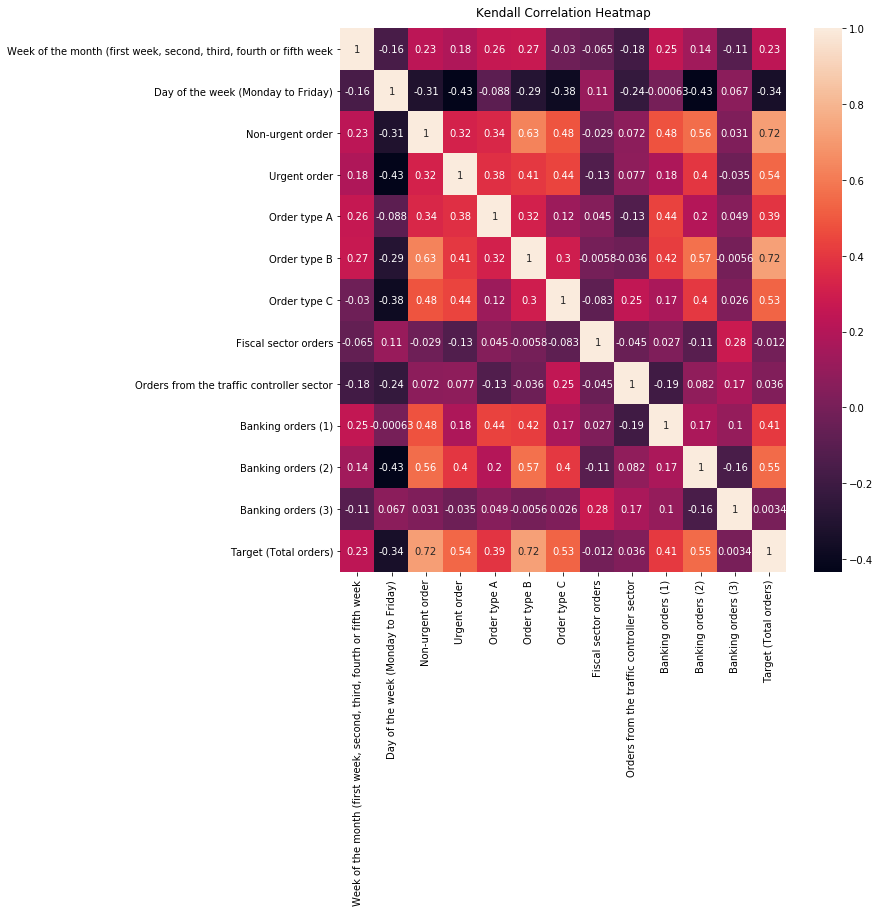

In [5]:
# Draw the correlation heatmaps using seaborn
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

<Figure size 1440x1440 with 0 Axes>

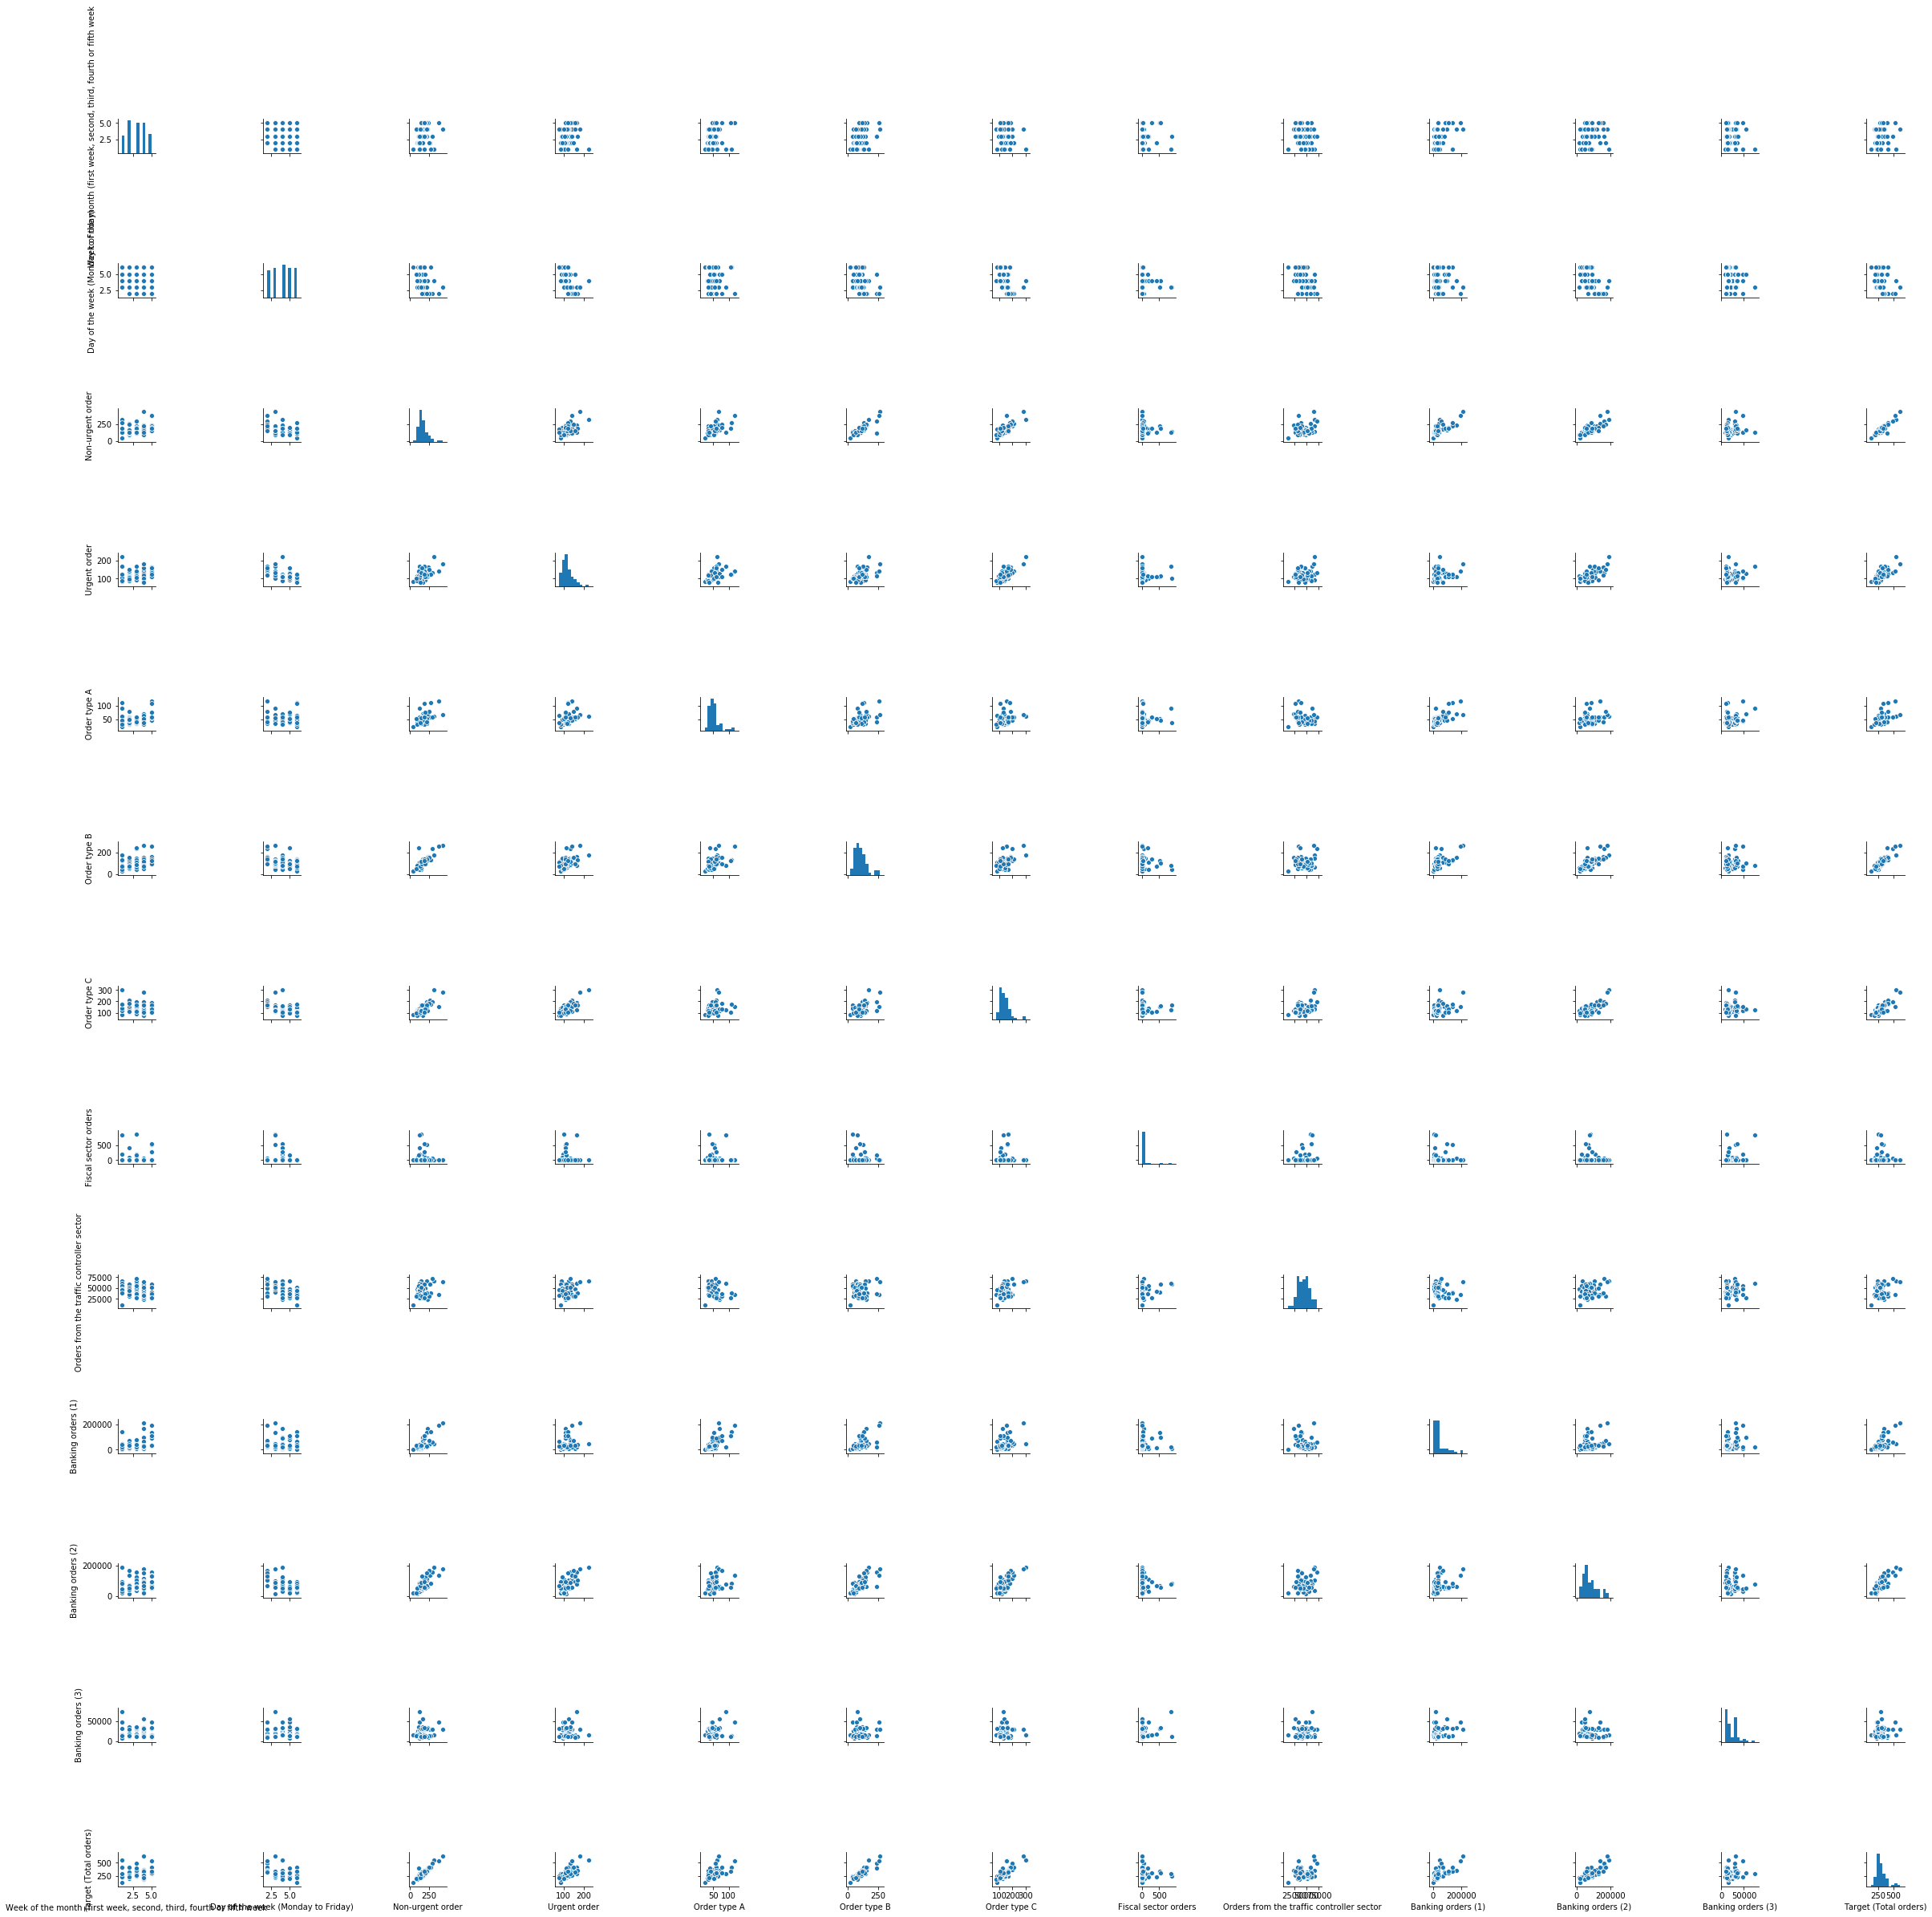

In [6]:
plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()

### Splitting data

In [7]:
# Get X (independent variables) and y (dependent variable)
y_label = 'Target (Total orders)'
X = data.loc[:, data.columns != y_label]
display(pd.DataFrame(X))
y = data.loc[:, y_label]
display(pd.DataFrame(y))

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948


,Target (Total orders)
0,539.577
1,224.675
2,129.412
3,317.120
4,210.517
5,207.364
6,263.043
7,248.958
8,344.291
9,248.428


In [8]:
X = df.drop(["Week of the month (first week, second, third, fourth or fifth week"], axis=1)
X = df.drop(["Day of the week (Monday to Friday)"], axis=1)
display(pd.DataFrame(X))

,"Week of the month (first week, second, third, fourth or fifth week",Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [9]:
from sklearn.model_selection import train_test_split
my_test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, shuffle=False)
X_train.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000
mean,2.708333,177.448187,120.489917,51.595937,108.342208,144.974250,86.269917,46634.708333,46459.12500,80147.145833,25796.416667,304.912396
std,1.202096,74.412287,28.551699,18.390072,51.813257,42.901471,203.675302,12166.351823,47921.72953,41769.528753,13396.495413,95.227766
min,1.000000,43.651000,77.371000,21.826000,25.125000,80.648000,0.000000,11992.000000,3452.00000,16411.000000,7679.000000,129.412000
25%,2.000000,125.348000,100.888000,40.912750,72.730500,116.451750,1.352000,38931.250000,19381.00000,50680.500000,14908.500000,238.195500
50%,3.000000,158.406500,113.698000,46.648500,99.482000,134.736500,9.301000,46809.500000,31521.50000,68335.500000,26982.000000,285.538500
75%,4.000000,209.368500,134.877000,58.037750,132.482250,162.104000,21.754000,54628.000000,45118.75000,101630.000000,32041.500000,338.726750
max,5.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.00000,188411.000000,73839.000000,616.453000


### Linear regression

In [10]:
# fit Simple Linear Regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slopes/coefficients
display(pd.DataFrame(regressor.coef_))

-1.0231815394945443e-12


,0
0,7.898713e-14
1,6.518735e-15
2,1.704338e-16
3,2.500000e-01
4,2.500000e-01
5,2.500000e-01
6,-1.206927e-16
7,2.457785e-17
8,1.395860e-18
9,4.361612e-18


In [11]:
# predict test result
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,402.607
1,255.061
2,342.606
3,268.640
4,188.601
5,202.022
6,213.509
7,316.849
8,286.412
9,303.447


In [12]:
# create error dataframe
error_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE', 'MAPE'], index = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'KNN Regression', 'Support Vector Regression', 'PLS Regression'])
display(error_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,NaN,NaN,NaN,NaN
Multiple Linear Regression,NaN,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


In [13]:
# create cross valudation dataframe
cv_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE', 'MAPE'], index = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'KNN Regression', 'Support Vector Regression', 'PLS Regression'])
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,NaN,NaN,NaN,NaN
Multiple Linear Regression,NaN,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


In [14]:
method = 'Linear Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores(cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,NaN,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,NaN,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Multiple Linear Regression

In [15]:
# === Step 3: Backward Elimination to optimize the model ===
import statsmodels.api as sm

# add the dummy variable ( X-zero) and set the values to ones for both training and test set
X_opt_train = sm.add_constant(X_train)
display(X_opt_train)

X_opt_test = sm.add_constant(X_test)
display(X_opt_test)

,const,"Week of the month (first week, second, third, fourth or fifth week",Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1.0,1,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1.0,1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1.0,1,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,1.0,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,1.0,2,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,1.0,2,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,1.0,2,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,1.0,2,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,1.0,3,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,1.0,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


,const,"Week of the month (first week, second, third, fourth or fifth week",Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
48,1.0,3,120.629,112.703,39.600,240.922,122.085,169.275,37387,20246,63778,13886,402.607
49,1.0,3,130.465,105.273,57.467,88.462,109.132,19.323,27200,41713,59513,12260,255.061
50,1.0,4,222.282,120.324,41.418,135.189,165.999,0.000,39446,29290,154144,10811,342.606
51,1.0,4,150.257,116.959,34.193,115.536,118.911,1.424,51346,19782,89704,12182,268.640
52,1.0,4,96.494,87.294,32.653,81.576,74.372,4.813,34631,22420,49644,15390,188.601
53,1.0,4,89.526,99.756,51.985,51.930,98.107,12.740,31850,32150,21573,13807,202.022
54,1.0,4,134.425,79.084,36.748,71.353,105.408,0.000,33970,28701,65199,11023,213.509
55,1.0,5,158.716,158.133,59.131,92.639,165.079,0.000,32027,33282,128269,9287,316.849
56,1.0,5,150.784,133.069,54.224,115.746,116.442,2.559,51235,34421,87708,11354,286.412
57,1.0,5,193.534,109.639,58.378,142.382,102.687,274.000,28364,88404,91367,15003,303.447


In [16]:
# the sm.OLS function requires constants
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 3.787e+28
Date:                   Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                           16:00:22   Log-Likelihood:                 1264.5
No. Observations:                     48   AIC:                            -2505.
Df Residuals:                         36   BIC:                            -2483.
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                              -5.258e-13   9.63e-13     -0.546      0.588   -2.48e-12    1.43e-12
Week of the month (first week, second, third, fourth or fifth week  9.948e-14   1.58e-13      0.629      0.534   -2.22e-13     4.2e-13
Non-urgent order                                                   -3.553e-15   2.13e-14     -0.167      0.869   -4.68e-14    3.97e-14
Urgent order                                                       -2.665e-15   1.85e-14     -0.144      0.886   -4.02e-14    3.48e-14
Order type A                                                           0.2500   1.07e-14   2.33e+13      0.000       0.250       0.250
Order type B                                                           0.2500   7.69e-15   3.25e+13      0.000       0.250       0.250
Order type C                                                           0.2500   7.77e-15   3.22e+13      0.000       0.250       0.250
Fiscal sector orders                                                -4.51e-16    9.5e-16     -0.475      0.638   -2.38e-15    1.48e-15
Orders from the traffic controller sector                           7.589e-18   1.94e-17      0.391      0.698   -3.18e-17    4.69e-17
Banking orders (1)                                                 -1.128e-17   1.15e-17     -0.983      0.332   -3.45e-17     1.2e-17
Banking orders (2)                                                  6.072e-18   1.42e-17      0.429      0.670   -2.26e-17    3.48e-17
Banking orders (3)                                                  5.042e-17   1.38e-17      3.655      0.001    2.24e-17    7.84e-17
Target (Total orders)                                                  0.7500   1.22e-14   6.15e+13      0.000       0.750       0.750
==============================================================================
Omnibus:                        6.727   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.209
Skew:                           0.583   Prob(JB):                       0.0449
Kurtosis:                       4.321   Cond. No.                     3.18e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.37e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
# Remove the variable having highest p value
del X_opt_train ['Non-urgent order']
del X_opt_test ['Non-urgent order']

In [18]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.132e+28
Date:                   Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                           16:00:23   Log-Likelihood:                 1232.6
No. Observations:                     48   AIC:                            -2443.
Df Residuals:                         37   BIC:                            -2423.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               2.842e-12   1.82e-12      1.562      0.127   -8.44e-13    6.53e-12
Week of the month (first week, second, third, fourth or fifth week -1.208e-13   2.95e-13     -0.409      0.685   -7.19e-13    4.77e-13
Urgent order                                                        2.365e-14   2.21e-14      1.069      0.292   -2.12e-14    6.85e-14
Order type A                                                           0.2500    1.9e-14   1.32e+13      0.000       0.250       0.250
Order type B                                                           0.2500   1.46e-14   1.71e+13      0.000       0.250       0.250
Order type C                                                           0.2500   1.12e-14   2.24e+13      0.000       0.250       0.250
Fiscal sector orders                                               -1.339e-15   1.77e-15     -0.755      0.455   -4.93e-15    2.26e-15
Orders from the traffic controller sector                           1.821e-17    3.4e-17      0.536      0.595   -5.07e-17    8.71e-17
Banking orders (1)                                                  3.578e-18    1.7e-17      0.210      0.835   -3.09e-17    3.81e-17
Banking orders (2)                                                  2.233e-17   2.08e-17      1.072      0.291   -1.99e-17    6.45e-17
Banking orders (3)                                                 -8.348e-17   2.64e-17     -3.166      0.003   -1.37e-16   -3.01e-17
Target (Total orders)                                                  0.7500    1.3e-14   5.78e+13      0.000       0.750       0.750
==============================================================================
Omnibus:                        5.937   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.099
Skew:                           0.785   Prob(JB):                       0.0781
Kurtosis:                       3.286   Cond. No.                     3.19e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.34e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# Remove the variable having highest p value
del X_opt_train ['Banking orders (1)']
del X_opt_test ['Banking orders (1)']

In [20]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 3.448e+28
Date:                   Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                           16:00:23   Log-Likelihood:                 1256.2
No. Observations:                     48   AIC:                            -2492.
Df Residuals:                         38   BIC:                            -2474.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               5.826e-13   1.09e-12      0.534      0.596   -1.62e-12    2.79e-12
Week of the month (first week, second, third, fourth or fifth week  7.105e-14   1.74e-13      0.407      0.686   -2.82e-13    4.24e-13
Urgent order                                                       -8.105e-15   1.07e-14     -0.759      0.452   -2.97e-14    1.35e-14
Order type A                                                           0.2500   1.09e-14   2.29e+13      0.000       0.250       0.250
Order type B                                                           0.2500   8.66e-15   2.89e+13      0.000       0.250       0.250
Order type C                                                           0.2500   6.58e-15    3.8e+13      0.000       0.250       0.250
Fiscal sector orders                                                6.176e-16   1.02e-15      0.604      0.549   -1.45e-15    2.69e-15
Orders from the traffic controller sector                          -2.797e-17   1.69e-17     -1.654      0.106   -6.22e-17    6.26e-18
Banking orders (2)                                                  2.277e-17   9.33e-18      2.441      0.019    3.88e-18    4.17e-17
Banking orders (3)                                                 -2.494e-17   1.59e-17     -1.566      0.126   -5.72e-17     7.3e-18
Target (Total orders)                                                  0.7500   3.85e-15   1.95e+14      0.000       0.750       0.750
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                1.054
Skew:                          -0.346   Prob(JB):                        0.590
Kurtosis:                       2.782   Cond. No.                     5.44e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
# Remove the variable having highest p value
del X_opt_train['Fiscal sector orders']
del X_opt_test['Fiscal sector orders']
X_opt_test

,const,"Week of the month (first week, second, third, fourth or fifth week",Urgent order,Order type A,Order type B,Order type C,Orders from the traffic controller sector,Banking orders (2),Banking orders (3),Target (Total orders)
48,1.0,3,112.703,39.600,240.922,122.085,37387,63778,13886,402.607
49,1.0,3,105.273,57.467,88.462,109.132,27200,59513,12260,255.061
50,1.0,4,120.324,41.418,135.189,165.999,39446,154144,10811,342.606
51,1.0,4,116.959,34.193,115.536,118.911,51346,89704,12182,268.640
52,1.0,4,87.294,32.653,81.576,74.372,34631,49644,15390,188.601
53,1.0,4,99.756,51.985,51.930,98.107,31850,21573,13807,202.022
54,1.0,4,79.084,36.748,71.353,105.408,33970,65199,11023,213.509
55,1.0,5,158.133,59.131,92.639,165.079,32027,128269,9287,316.849
56,1.0,5,133.069,54.224,115.746,116.442,51235,87708,11354,286.412
57,1.0,5,109.639,58.378,142.382,102.687,28364,91367,15003,303.447


In [22]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.682e+27
Date:                   Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                           16:00:23   Log-Likelihood:                 1180.2
No. Observations:                     48   AIC:                            -2342.
Df Residuals:                         39   BIC:                            -2326.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               5.684e-14   5.09e-12      0.011      0.991   -1.02e-11    1.04e-11
Week of the month (first week, second, third, fourth or fifth week  1.137e-13   7.98e-13      0.142      0.888    -1.5e-12    1.73e-12
Urgent order                                                       -7.883e-15   5.09e-14     -0.155      0.878   -1.11e-13     9.5e-14
Order type A                                                           0.2500      5e-14      5e+12      0.000       0.250       0.250
Order type B                                                           0.2500   3.71e-14   6.74e+12      0.000       0.250       0.250
Order type C                                                           0.2500   3.14e-14   7.95e+12      0.000       0.250       0.250
Orders from the traffic controller sector                          -2.528e-16   7.94e-17     -3.182      0.003   -4.14e-16   -9.21e-17
Banking orders (2)                                                  3.665e-17   4.29e-17      0.853      0.399   -5.02e-17    1.24e-16
Banking orders (3)                                                  3.539e-16   7.28e-17      4.861      0.000    2.07e-16    5.01e-16
Target (Total orders)                                                  0.7500   1.85e-14   4.06e+13      0.000       0.750       0.750
==============================================================================
Omnibus:                        7.994   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.015
Skew:                          -0.865   Prob(JB):                       0.0300
Kurtosis:                       3.719   Cond. No.                     2.83e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
# Remove the variable having highest p value
del X_opt_train['Urgent order']
del X_opt_test['Urgent order']
X_opt_test

,const,"Week of the month (first week, second, third, fourth or fifth week",Order type A,Order type B,Order type C,Orders from the traffic controller sector,Banking orders (2),Banking orders (3),Target (Total orders)
48,1.0,3,39.600,240.922,122.085,37387,63778,13886,402.607
49,1.0,3,57.467,88.462,109.132,27200,59513,12260,255.061
50,1.0,4,41.418,135.189,165.999,39446,154144,10811,342.606
51,1.0,4,34.193,115.536,118.911,51346,89704,12182,268.640
52,1.0,4,32.653,81.576,74.372,34631,49644,15390,188.601
53,1.0,4,51.985,51.930,98.107,31850,21573,13807,202.022
54,1.0,4,36.748,71.353,105.408,33970,65199,11023,213.509
55,1.0,5,59.131,92.639,165.079,32027,128269,9287,316.849
56,1.0,5,54.224,115.746,116.442,51235,87708,11354,286.412
57,1.0,5,58.378,142.382,102.687,28364,91367,15003,303.447


In [24]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 4.218e+27
Date:                   Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                           16:00:23   Log-Likelihood:                 1198.5
No. Observations:                     48   AIC:                            -2381.
Df Residuals:                         40   BIC:                            -2366.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               1.592e-12   3.22e-12      0.494      0.624   -4.92e-12    8.11e-12
Week of the month (first week, second, third, fourth or fifth week  1.208e-13   5.33e-13      0.226      0.822   -9.57e-13     1.2e-12
Order type A                                                           0.2500   3.31e-14   7.56e+12      0.000       0.250       0.250
Order type B                                                           0.2500    2.3e-14   1.09e+13      0.000       0.250       0.250
Order type C                                                           0.2500   1.91e-14   1.31e+13      0.000       0.250       0.250
Orders from the traffic controller sector                          -2.134e-16   5.34e-17     -3.994      0.000   -3.21e-16   -1.05e-16
Banking orders (2)                                                   4.12e-17   2.84e-17      1.450      0.155   -1.62e-17    9.86e-17
Banking orders (3)                                                   2.19e-16   4.91e-17      4.459      0.000     1.2e-16    3.18e-16
Target (Total orders)                                                  0.7500   1.09e-14   6.88e+13      0.000       0.750       0.750
==============================================================================
Omnibus:                        4.716   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.804
Skew:                          -0.675   Prob(JB):                        0.149
Kurtosis:                       3.281   Cond. No.                     2.67e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.17e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
regressor = LinearRegression()
regressor.fit(X_opt_train, y_train)
print(regressor.intercept_)
display(pd.DataFrame(regressor.coef_))

-1.0800249583553523e-12


,0
0,0.000000e+00
1,-4.837060e-13
2,2.500000e-01
3,2.500000e-01
4,2.500000e-01
5,4.339658e-17
6,-1.151512e-17
7,5.996870e-17
8,7.500000e-01


In [26]:
# Predict test set result
y_pred = regressor.predict(X_opt_test)
display(pd.DataFrame(y_pred))

,0
0,402.607
1,255.061
2,342.606
3,268.640
4,188.601
5,202.022
6,213.509
7,316.849
8,286.412
9,303.447


In [27]:
method = 'Multiple Linear Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,NaN,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Polynomial regression

In [28]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg.fit(X_poly_train, y_train)

PolynomialFeatures()

In [29]:
# the code to compare the results of polynomial regression to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Predict test set result
y_pred = lin_reg_2.predict(X_poly_test)
display(pd.DataFrame(y_pred))

,0
0,480.032163
1,252.372387
2,342.875533
3,278.084993
4,210.371987
5,201.177835
6,230.401882
7,329.677091
8,295.871810
9,302.365689


In [30]:
method = 'Polynomial Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,NaN,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Lasso Regression

In [31]:
#Fitting lasso regression to dataset
from sklearn.linear_model import Lasso
regr = Lasso(alpha = 0.5)
regr.fit(X_train, y_train)

#prediction of new value
y_pred = regr.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,402.349488
1,254.983428
2,342.773932
3,268.791586
4,188.699418
5,201.918732
6,213.515338
7,317.201858
8,286.582046
9,303.470609


In [32]:
method = 'Lasso Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,NaN,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Ridge Regression

In [33]:
#Fitting ridge regression to dataset
from sklearn.linear_model import Ridge
regr = Ridge(alpha = 0.1)
regr.fit(X_train, y_train)

#prediction of new value
y_pred = regr.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,402.604454
1,255.060728
2,342.606022
3,268.640097
4,188.601032
5,202.021765
6,213.509030
7,316.848764
8,286.411956
9,303.447120


In [34]:
method = 'Ridge Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,NaN,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Elastic Net Regression

In [35]:
#Fitting elastic net regression to dataset
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=1.0, l1_ratio=0.5)
regr.fit(X_train, y_train)

#prediction of new value
y_pred = regr.predict(X_test)
y_pred

array([401.88244012, 254.92762264, 342.90046597, 268.83965246,
       188.74893191, 201.85192647, 213.59676453, 317.26351892,
       286.58193492, 303.48679226, 304.84843885, 331.46691522])

In [36]:
method = 'Elastic Net Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Decision Tree Regression,NaN,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Decision Tree Regression

In [37]:
#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split  = 2)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,344.291
1,246.992
2,357.394
3,263.043
4,210.517
5,207.364
6,210.517
7,317.120
8,281.420
9,306.356


In [38]:
method = 'Decision Tree Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,10.6714,355.936,18.8663,0.036168
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Decision Tree Regression,-12.8833,-572.583,-25.7299,-0.0467593
Random Forest Regression,NaN,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Random Forest Regression

In [39]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,392.54764
1,255.00372
2,350.74066
3,262.32221
4,213.82197
5,216.19842
6,218.92905
7,318.83592
8,295.17409
9,307.53164


In [40]:
method = 'Random Forest Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,10.6714,355.936,18.8663,0.036168
Random Forest Regression,7.5927,99.7911,9.98955,0.0311723
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Decision Tree Regression,-12.8833,-572.583,-25.7299,-0.0467593
Random Forest Regression,-10.3056,-477.504,-16.1747,-0.0339376
Gradient Boosting Regression,NaN,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN,NaN


### Gradient Boosting

In [41]:
#Fitting gradient boosting regression to dataset
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=1.0)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,490.790
1,246.992
2,357.394
3,268.002
4,207.364
5,210.517
6,210.517
7,317.120
8,289.657
9,306.356


In [42]:
method = 'Gradient Boosting Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,10.6714,355.936,18.8663,0.036168
Random Forest Regression,7.5927,99.7911,9.98955,0.0311723
Gradient Boosting Regression,12.8942,711.614,26.6761,0.0410929
KNN Regression,NaN,NaN,NaN,NaN


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Decision Tree Regression,-12.8833,-572.583,-25.7299,-0.0467593
Random Forest Regression,-10.3056,-477.504,-16.1747,-0.0339376
Gradient Boosting Regression,-15.5375,-2092.92,-20.3464,-0.0509058
KNN Regression,NaN,NaN,NaN,NaN


### KNN Regression

In [43]:
#Fitting KNN regression to dataset
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)

#prediction of test values
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,241.7305
1,239.5110
2,406.8905
3,266.7775
4,241.8410
5,233.9250
6,239.5110
7,360.3980
8,246.3385
9,288.7250


In [44]:
method = 'KNN Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,10.6714,355.936,18.8663,0.036168
Random Forest Regression,7.5927,99.7911,9.98955,0.0311723
Gradient Boosting Regression,12.8942,711.614,26.6761,0.0410929
KNN Regression,39.1991,3228.37,56.8188,0.133514


,MAE,MSE,RMSE,MAPE
Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Multiple Linear Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Polynomial Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Lasso Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Ridge Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Elastic Net Regression,-1.29935e-12,-3.21072e-24,-1.5756e-12,-4.44574e-15
Decision Tree Regression,-12.8833,-572.583,-25.7299,-0.0467593
Random Forest Regression,-10.3056,-477.504,-16.1747,-0.0339376
Gradient Boosting Regression,-15.5375,-2092.92,-20.3464,-0.0509058
KNN Regression,-38.0455,-2704.33,-48.7359,-0.129857


### Support Vector Regression

In [45]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,4509.226748
1,497.297493
2,-819.973158
3,-300.233237
4,672.203913
5,877.275430
6,784.898275
7,-2387.335331
8,-1190.877197
9,-1612.928528


In [ ]:
method = 'Support Vector Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE,MAPE
Linear Regression,4.83169e-13,4.67443e-25,6.83698e-13,1.60437e-15
Multiple Linear Regression,2.19558e-12,5.84944e-24,2.41856e-12,7.7431e-15
Polynomial Regression,19.7625,889.607,29.8263,0.0650521
Lasso Regression,0.145576,0.0309966,0.176059,0.000490343
Ridge Regression,0.000339435,5.69978e-07,0.000754969,9.93612e-07
Elastic Net Regression,0.24306,0.094002,0.306597,0.000802765
Decision Tree Regression,10.6714,355.936,18.8663,0.036168
Random Forest Regression,7.5927,99.7911,9.98955,0.0311723
Gradient Boosting Regression,12.8942,711.614,26.6761,0.0410929
KNN Regression,39.1991,3228.37,56.8188,0.133514


### Partial Least Squares (PLS) Regression

In [ ]:
# Fitting PLS Regression to dataset
from sklearn.cross_decomposition import PLSRegression, PLSSVD
regressor = PLSRegression(n_components = 2)
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
method = 'PLS Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

In [ ]:
error_df.sort_values(by=['MAPE'], inplace=True)
error_df